In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
df = pd.read_csv('/Users/ashutoshregmi/ML_Prac/Bank_Logistic/bank-full.csv', sep=';')

In [68]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [70]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

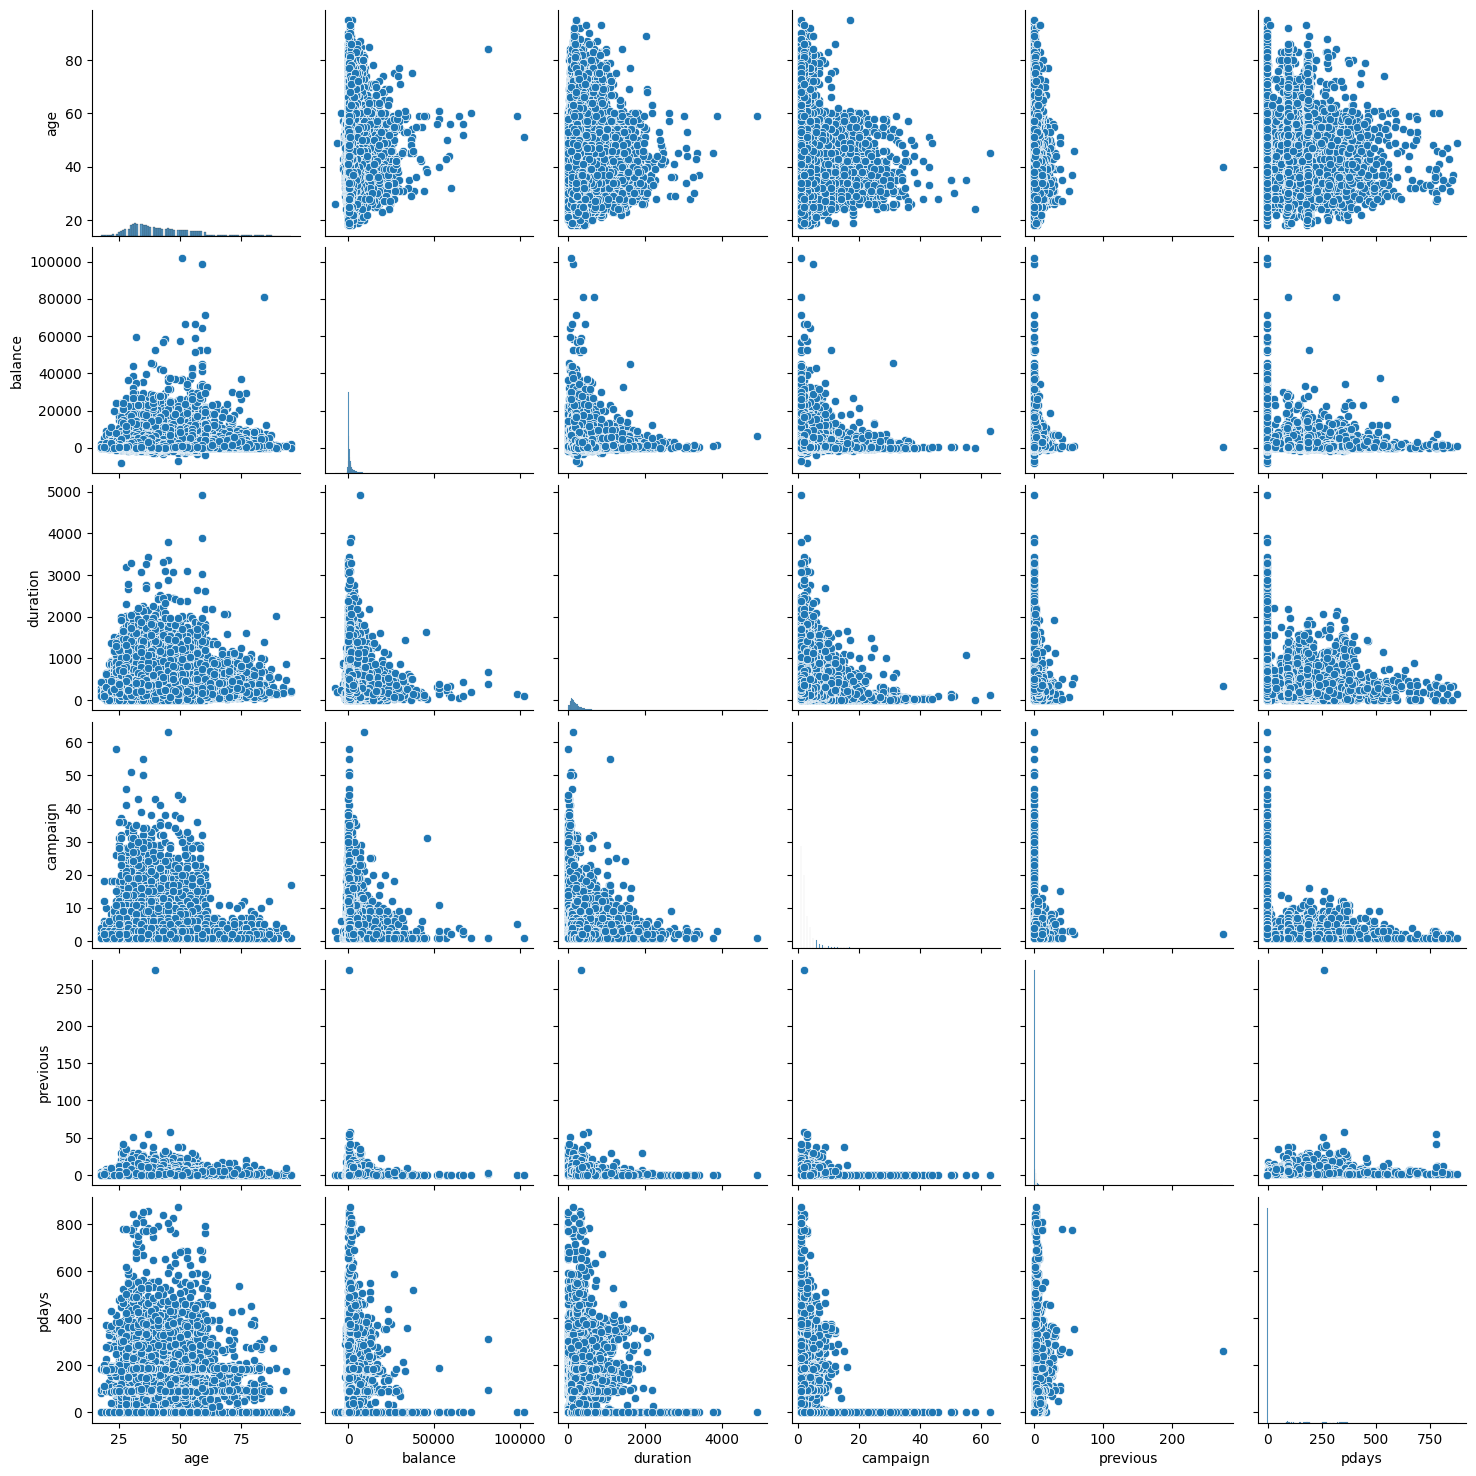

In [71]:
numerical_df = df[['age', 'balance', 'duration', 'campaign', 'previous', 'pdays']]
sns.pairplot(numerical_df)

In [72]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [73]:
df.rename(columns={'y': 'subscribed'}, inplace=True)

In [74]:
df['subscribed'] = df['subscribed'].map({'no': 0, 'yes': 1})

# Binary variables
df['default'] = df['default'].map({'no': 0, 'yes': 1})
df['housing'] = df['housing'].map({'no': 0, 'yes': 1})
df['loan'] = df['loan'].map({'no': 0, 'yes': 1})

# Marital status
df['marital'] = df['marital'].map({'single': 0, 'married': 1, 'divorced': 2})

# Education
df['education'] = df['education'].map({'primary': 1, 'secondary': 2, 'tertiary': 3, 'unknown': 0})

# Job - assign numbers to each job type
df['job'] = df['job'].map({
    'admin.': 1, 'blue-collar': 2, 'entrepreneur': 3, 'housemaid': 4,
    'management': 5, 'retired': 6, 'self-employed': 7, 'services': 8,
    'student': 9, 'technician': 10, 'unemployed': 11, 'unknown': 0
})

# Contact
df['contact'] = df['contact'].map({'cellular': 1, 'telephone': 2, 'unknown': 0})

# Month
df['month'] = df['month'].map({
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
})

# Previous outcome
df['poutcome'] = df['poutcome'].map({'failure': 0, 'other': 1, 'success': 2, 'unknown': 3})



In [75]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,5,1,3,0,2143,1,0,0,5,5,261,1,-1,0,3,0
1,44,10,0,2,0,29,1,0,0,5,5,151,1,-1,0,3,0
2,33,3,1,2,0,2,1,1,0,5,5,76,1,-1,0,3,0
3,47,2,1,0,0,1506,1,0,0,5,5,92,1,-1,0,3,0
4,33,0,0,0,0,1,0,0,0,5,5,198,1,-1,0,3,0
